In [ ]:
import numpy as np
import pandas as pd

df = pd.read_csv('mushroom edibility classification dataset.csv')
df.isnull().sum()


Unnamed: 0                  0
class                       0
cap-shape                   8
cap-surface                 0
cap-color                   8
bruises                     0
odor                        0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [ ]:
df.shape

(3124, 20)

In [ ]:
df.drop(df[df['cap-shape'].isnull() ].index , axis = 0 , inplace=True)
df.drop(df[df['cap-color'].isnull()].index , axis = 0 , inplace=True)

In [ ]:
df.drop(columns=['Unnamed: 0' , 'veil-type'])
df.shape

(3108, 20)

In [ ]:
df.head()

,Unnamed: 0,class,cap-shape,cap-surface,cap-color,bruises,odor,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,poisonous,5.0,2,4.0,bruises is there,6,0,3,2,2,7,7,0,2,1,4,2,3,5
1,1,edible,5.0,2,9.0,bruises is there,0,0,2,2,2,7,7,0,2,1,4,3,2,1
2,2,edible,0.0,2,8.0,bruises is there,3,0,2,2,2,7,7,0,2,1,4,3,2,3
3,3,poisonous,5.0,3,8.0,bruises is there,6,0,3,2,2,7,7,0,2,1,4,2,3,5
4,4,edible,5.0,2,3.0,no bruises,5,1,3,2,2,7,7,0,2,1,0,3,0,1


Checking if any null values left in df

In [ ]:
df[df.columns].isnull().any()

Unnamed: 0                  False
class                       False
cap-shape                   False
cap-surface                 False
cap-color                   False
bruises                     False
odor                        False
stalk-shape                 False
stalk-root                  False
stalk-surface-above-ring    False
stalk-surface-below-ring    False
stalk-color-above-ring      False
stalk-color-below-ring      False
veil-type                   False
veil-color                  False
ring-number                 False
ring-type                   False
spore-print-color           False
population                  False
habitat                     False
dtype: bool

Categorical value encoding

In [ ]:
df["class"] = [1 if i == "poisonous" else 0 for i in df["class"]]
df["bruises"] = [1 if i == "bruises is there" else 0 for i in df["bruises"]]
df.head()

,Unnamed: 0,class,cap-shape,cap-surface,cap-color,bruises,odor,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,1,5.0,2,4.0,1,6,0,3,2,2,7,7,0,2,1,4,2,3,5
1,1,0,5.0,2,9.0,1,0,0,2,2,2,7,7,0,2,1,4,3,2,1
2,2,0,0.0,2,8.0,1,3,0,2,2,2,7,7,0,2,1,4,3,2,3
3,3,1,5.0,3,8.0,1,6,0,3,2,2,7,7,0,2,1,4,2,3,5
4,4,0,5.0,2,3.0,0,5,1,3,2,2,7,7,0,2,1,0,3,0,1


#Separate features and labels

In [ ]:
labels = df['class']
features = df[df.columns[2:]]

In [ ]:
features

,cap-shape,cap-surface,cap-color,bruises,odor,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5.0,2,4.0,1,6,0,3,2,2,7,7,0,2,1,4,2,3,5
1,5.0,2,9.0,1,0,0,2,2,2,7,7,0,2,1,4,3,2,1
2,0.0,2,8.0,1,3,0,2,2,2,7,7,0,2,1,4,3,2,3
3,5.0,3,8.0,1,6,0,3,2,2,7,7,0,2,1,4,2,3,5
4,5.0,2,3.0,0,5,1,3,2,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3118,5.0,2,3.0,0,1,0,1,2,2,7,7,0,2,1,4,2,4,0
3120,2.0,0,3.0,1,5,1,1,2,2,6,3,0,2,1,4,2,5,0
3121,2.0,3,3.0,1,5,1,1,2,2,3,7,0,2,1,4,3,5,0
3122,5.0,0,3.0,0,2,0,1,1,1,4,0,0,2,1,2,1,5,0


#Scaling Feature Vector

In [ ]:
import pandas as pd
from sklearn import preprocessing

x = features.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
features = pd.DataFrame(x_scaled , columns=features.columns)

In [ ]:
features

,cap-shape,cap-surface,cap-color,bruises,odor,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1.0,0.666667,0.285714,1.0,1.000000,0.0,0.666667,1.0,0.666667,1.000000,1.000000,0.0,0.0,0.0,1.0,0.2,0.6,1.0
1,1.0,0.666667,1.000000,1.0,0.000000,0.0,0.333333,1.0,0.666667,1.000000,1.000000,0.0,0.0,0.0,1.0,0.4,0.4,0.2
2,0.0,0.666667,0.857143,1.0,0.500000,0.0,0.333333,1.0,0.666667,1.000000,1.000000,0.0,0.0,0.0,1.0,0.4,0.4,0.6
3,1.0,1.000000,0.857143,1.0,1.000000,0.0,0.666667,1.0,0.666667,1.000000,1.000000,0.0,0.0,0.0,1.0,0.2,0.6,1.0
4,1.0,0.666667,0.142857,0.0,0.833333,1.0,0.666667,1.0,0.666667,1.000000,1.000000,0.0,0.0,0.0,0.0,0.4,0.0,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3103,1.0,0.666667,0.142857,0.0,0.166667,0.0,0.000000,1.0,0.666667,1.000000,1.000000,0.0,0.0,0.0,1.0,0.2,0.8,0.0
3104,0.4,0.000000,0.142857,1.0,0.833333,1.0,0.000000,1.0,0.666667,0.857143,0.428571,0.0,0.0,0.0,1.0,0.2,1.0,0.0
3105,0.4,1.000000,0.142857,1.0,0.833333,1.0,0.000000,1.0,0.666667,0.428571,1.000000,0.0,0.0,0.0,1.0,0.4,1.0,0.0
3106,1.0,0.000000,0.142857,0.0,0.333333,0.0,0.000000,0.5,0.333333,0.571429,0.000000,0.0,0.0,0.0,0.5,0.0,1.0,0.0


In [ ]:
labels.value_counts()

0    2776
1     332
Name: class, dtype: int64

#SVM

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.2)

Training accuracy of the model is 0.99
Testing accuracy of the model is 0.99
0    551
1     71
Name: class, dtype: int64


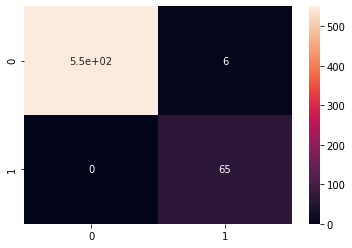

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from seaborn import heatmap


svc = SVC(kernel="linear")
svc.fit(x_train, y_train)
print("Training accuracy of the model is {:.2f}".format(svc.score(x_train, y_train)))
print("Testing accuracy of the model is {:.2f}".format(svc.score(x_test, y_test)))
print(y_test.value_counts())
prePCA_SVC = svc.score(x_test, y_test)
predictions = svc.predict(x_test)
mat=confusion_matrix(predictions, y_test)

heatmap(mat , xticklabels=['0' ,'1' ], yticklabels=['0' ,'1',], annot=True)

#RANDOM FOREST


The Training accuracy of the model is 1.00
The Testing accuracy of the model is 1.00


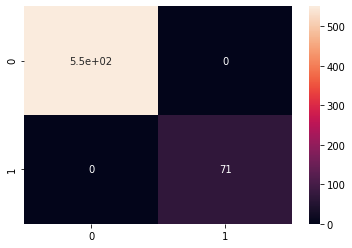

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

rfc = RandomForestClassifier(n_estimators=50)
rfc.fit(x_train, y_train)
print("The Training accuracy of the model is {:.2f}".format(rfc.score(x_train, y_train)))
print("The Testing accuracy of the model is {:.2f}".format(rfc.score(x_test, y_test)))
prePCA_rf = rfc.score(x_test, y_test)
predictions = rfc.predict(x_test)
mat=confusion_matrix(predictions, y_test)
heatmap(mat , xticklabels=['0' ,'1' ], yticklabels=['0' ,'1',], annot=True)

#MLP 


The Training accuracy of the model is 1.00
The Testing accuracy of the model is 1.00


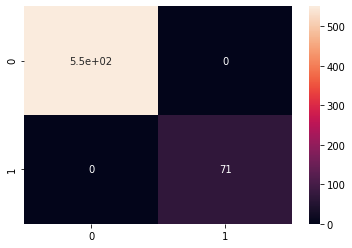

In [ ]:
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import confusion_matrix

nnc=MLPClassifier(hidden_layer_sizes=(7), activation="relu", max_iter=10000)
nnc.fit(x_train, y_train)

print("The Training accuracy of the model is {:.2f}".format(nnc.score(x_train, y_train)))
print("The Testing accuracy of the model is {:.2f}".format(nnc.score(x_test, y_test)))
prePCA_nnc = nnc.score(x_test, y_test)
predictions = nnc.predict(x_test)
mat=confusion_matrix(predictions, y_test)

heatmap(mat , xticklabels=['0' ,'1' ], yticklabels=['0' ,'1',], annot=True)

#Applying PCA dimensionality reduction

In [ ]:
from sklearn.decomposition import PCA 
pca = PCA(n_components=9)
principal_components= pca.fit_transform(features)
print(principal_components)

[[-0.5346839   0.48048445  0.13454821 ... -0.26118435 -0.24112167
  -0.24360897]
 [-0.74111665  0.60632748  0.05285431 ...  0.11819112  0.02532216
  -0.19907207]
 [-0.69674577  0.74489712  0.30936096 ... -0.03263064 -0.20425787
  -0.15660239]
 ...
 [-0.40223886 -0.65361807 -0.44125272 ...  0.12490534 -0.00650501
   0.16963894]
 [ 0.42229825 -0.14628777  0.56935506 ...  0.79954353 -0.29600477
   0.14721468]
 [-0.32443281 -0.75324105 -0.60197055 ...  0.14471474 -0.04619324
  -0.10179057]]


In [ ]:
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

[0.35036841 0.25548176 0.08542319 0.07372024 0.05563973 0.03624039
 0.02970516 0.02480696 0.02104978]
0.9324356293741436


In [ ]:
principal_df = pd.DataFrame(data=principal_components)
#principal_df.head()
main_df=pd.concat([principal_df, labels], axis=1)
main_df=main_df.iloc[:-15]
main_df

,0,1,2,3,4,5,6,7,8,class
0,-0.534684,0.480484,0.134548,0.802692,-0.286537,-0.147085,-0.261184,-0.241122,-0.243609,1.0
1,-0.741117,0.606327,0.052854,-0.127881,0.748189,0.019186,0.118191,0.025322,-0.199072,0.0
2,-0.696746,0.744897,0.309361,-0.487277,-0.291406,-0.017026,-0.032631,-0.204258,-0.156602,0.0
3,-0.698224,0.769857,-0.136966,0.588397,-0.086572,-0.228376,-0.383700,-0.412745,0.048525,1.0
4,1.044658,0.258192,-0.447595,0.246196,0.010657,-0.472083,0.296154,0.247203,-0.298846,0.0
...,...,...,...,...,...,...,...,...,...,...
3103,-0.192598,0.183717,0.114783,0.374702,0.299875,0.356139,0.839126,0.181983,-0.018803,1.0
3104,-0.123896,-0.915757,0.430153,-0.266432,-0.276690,0.098913,0.002839,-0.010488,0.035213,1.0
3105,-0.402239,-0.653618,-0.441253,-0.263511,-0.450522,0.122291,0.124905,-0.006505,0.169639,0.0
3106,0.422298,-0.146288,0.569355,0.422439,0.336733,0.975105,0.799544,-0.296005,0.147215,0.0


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(principal_components, labels, test_size=0.2)

#SVM

Training accuracy of the model is 0.96
Testing accuracy of the model is 0.97
0    561
1     61
Name: class, dtype: int64


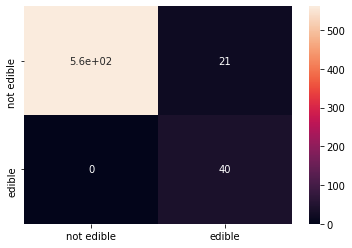

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from seaborn import heatmap


svc = SVC(kernel="linear")
svc.fit(x_train, y_train)
print("Training accuracy of the model is {:.2f}".format(svc.score(x_train, y_train)))
print("Testing accuracy of the model is {:.2f}".format(svc.score(x_test, y_test)))
print(y_test.value_counts())
postPCA_SVC = svc.score(x_test, y_test)
predictions = svc.predict(x_test)
mat=confusion_matrix(predictions, y_test)

heatmap(mat , xticklabels=['not edible' ,'edible' ], yticklabels=['not edible' ,'edible'], annot=True)

#RF

The Training accuracy of the model is 1.00
The Testing accuracy of the model is 1.00


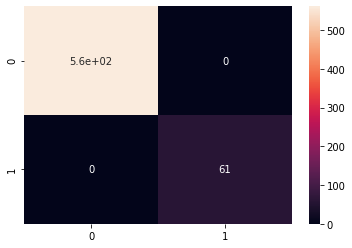

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

rfc = RandomForestClassifier(n_estimators=50)
rfc.fit(x_train, y_train)
print("The Training accuracy of the model is {:.2f}".format(rfc.score(x_train, y_train)))
print("The Testing accuracy of the model is {:.2f}".format(rfc.score(x_test, y_test)))
predictions = rfc.predict(x_test)
post_PCA_rfc = rfc.score(x_test, y_test)
mat=confusion_matrix(predictions, y_test)
heatmap(mat , xticklabels=['0' ,'1' ], yticklabels=['0' ,'1',], annot=True)

#MLP


The Training accuracy of the model is 1.00
The Testing accuracy of the model is 1.00


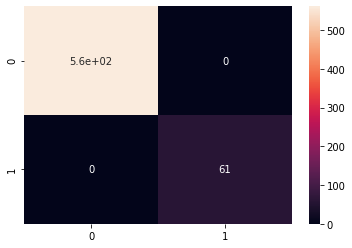

In [ ]:
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import confusion_matrix

nnc=MLPClassifier(hidden_layer_sizes=(7), activation="relu", max_iter=10000)
nnc.fit(x_train, y_train)

print("The Training accuracy of the model is {:.2f}".format(nnc.score(x_train, y_train)))
print("The Testing accuracy of the model is {:.2f}".format(nnc.score(x_test, y_test)))
postPCA_nnc = nnc.score(x_test, y_test)
predictions = nnc.predict(x_test)
mat=confusion_matrix(predictions, y_test)

heatmap(mat , xticklabels=['0' ,'1' ], yticklabels=['0' ,'1',], annot=True)

GRAPH FOR SVC


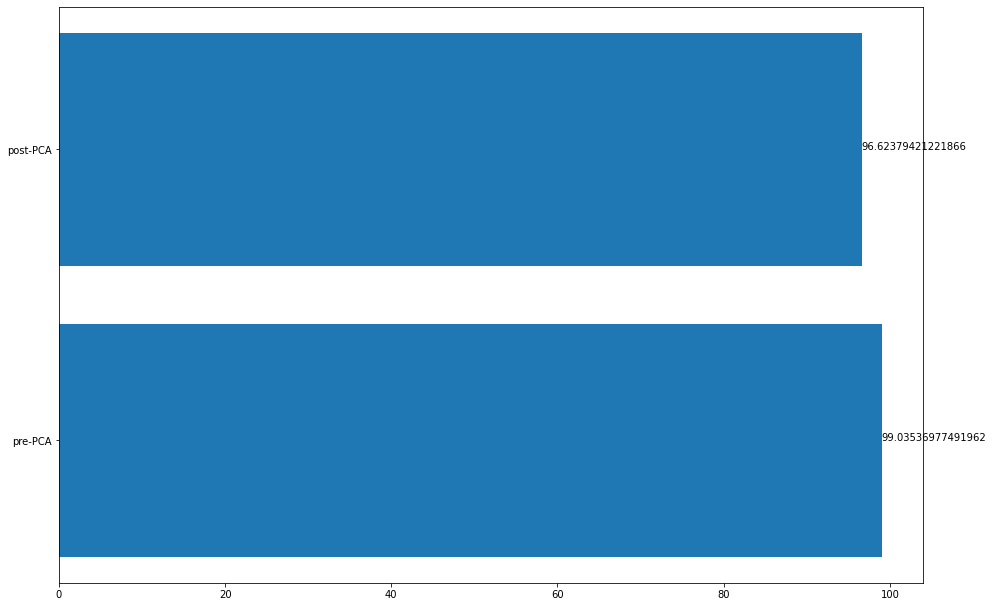

In [ ]:
import matplotlib.pyplot as plt

print("GRAPH FOR SVC")
fig = plt.figure(figsize=(12,8))

ax = fig.add_axes([0,0,1,1])

y = ['pre-PCA', 'post-PCA']
score = [prePCA_SVC*100 , postPCA_SVC*100]
ax.barh(y,score)

for index, value in enumerate(score):
    plt.text(value, index, str(value))

plt.show()

In [ ]:
post_PCA_rfc

1.0

In [ ]:
model = LogisticRegression()
model.fit(x_train, y_train) #Training the model
predictions = model.predict(x_test)
print(predictions)

[0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0
 0 0 0 0 0 1 0 1 0 0 1 0 

In [ ]:
logistic_accu = accuracy_score(y_test, predictions)
print(logistic_accu)

0.9887459807073955


In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(criterion='entropy',random_state=1)
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print(y_pred)

[0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0
 0 0 0 0 0 1 0 1 0 1 1 0 

In [ ]:
decTree_accu = accuracy_score(y_pred,y_test)
print(decTree_accu)

1.0


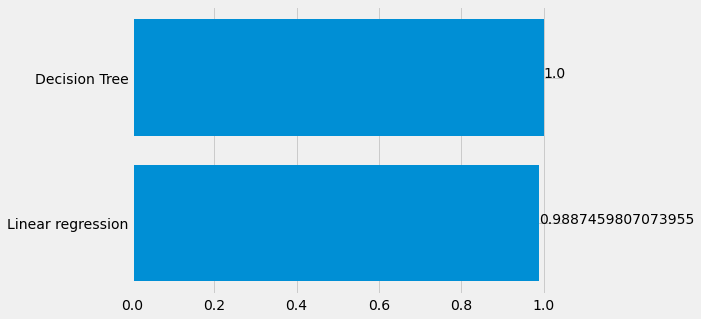

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure()

ax = fig.add_axes([0,0,1,1])

model = ['Linear regression', 'Decision Tree']
score = [logistic_accu , decTree_accu]
ax.barh(model,score)

for index, value in enumerate(score):
    plt.text(value, index, str(value))

plt.show()